In [2]:
# Initialize Otter
import otter

grader = otter.Notebook("12-exercise-pids2024.ipynb")

# Exercise sheet 12

**Points: 15**

In this exercise sheet you can train for the exam by solving selected exercises from 
the "insurance tests".

This notebook can be automatically graded using Otter grader. To find how many points you get, simply run `grader.check_all()` from a new cell. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

### Question 1a: Tidy dataset (1 Point)

The following dataset is not tidy. Please make it tidy by melting it. It should have a new column *subject* and a new column *score*.  

In [7]:
data = {
    'Student_ID': ['S001', 'S002', 'S003', 'S004'],
    'Name': ['Alex', 'Bryan', 'Cathy', 'Diana'],
    'Math': [88, 72, 94, 89],
    'Science': [84, 76, 88, 92],
    'English': [90, 82, 95, 88]
}

grades = pd.DataFrame(data)
display(grades)

,Student_ID,Name,Math,Science,English
0,S001,Alex,88,84,90
1,S002,Bryan,72,76,82
2,S003,Cathy,94,88,95
3,S004,Diana,89,92,88


In [14]:
class Question1a:
    grades_tidy = grades.melt(
        id_vars=['Student_ID', 'Name'],
        value_name='score',
        value_vars=['Math', 'Science', 'English'],
        var_name='subject'
    )


#help(grades.melt)
Question1a.grades_tidy

,Student_ID,Name,subject,score
0,S001,Alex,Math,88
1,S002,Bryan,Math,72
2,S003,Cathy,Math,94
3,S004,Diana,Math,89
4,S001,Alex,Science,84
5,S002,Bryan,Science,76
6,S003,Cathy,Science,88
7,S004,Diana,Science,92
8,S001,Alex,English,90
9,S002,Bryan,English,82


In [15]:
grader.check("Question 1a")

Question 1a results: All test cases passed!

### Question 1b (1 Point): 

Sort the values in the following dataframe according to descending temperatures.

In [16]:
data = {
    'Date': ['2023-03-05', '2023-03-03', '2023-03-04', '2023-03-05', '2023-03-03', '2023-03-04', '2023-03-02',
             '2023-03-01', '2023-03-02', '2023-03-01', '2023-03-05', '2023-03-03', '2023-03-04', '2023-03-02',
             '2023-03-01'],
    'City': ['New York', 'New York', 'New York', 'Los Angeles', 'Los Angeles', 'Los Angeles', 'Los Angeles',
             'Los Angeles', 'New York', 'New York', 'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago'],
    'Temperature': [12, 10, 11, 19, 18, 20, 17, 16, 9, 8, 5, 7, 6, 4, 3]
}

temperatures = pd.DataFrame(data)
display(temperatures)

,Date,City,Temperature
0,2023-03-05,New York,12
1,2023-03-03,New York,10
2,2023-03-04,New York,11
3,2023-03-05,Los Angeles,19
4,2023-03-03,Los Angeles,18
5,2023-03-04,Los Angeles,20
6,2023-03-02,Los Angeles,17
7,2023-03-01,Los Angeles,16
8,2023-03-02,New York,9
9,2023-03-01,New York,8


In [18]:
class Question1b:
    temperatures_sorted = temperatures.sort_values('Temperature', ascending=False)  # your answer

In [19]:
grader.check("Question 1b")

Question 1b results: All test cases passed!

### Question 1c (1 Point)

Create a new dataframe `cold_temperatures`, which contains only the rows, where the temperature is below 15 degrees. 

In [21]:
class Question1c:
    cold_temperatures = temperatures[temperatures['Temperature'] < 15]  # your answer
    display(cold_temperatures)

,Date,City,Temperature
0,2023-03-05,New York,12
1,2023-03-03,New York,10
2,2023-03-04,New York,11
8,2023-03-02,New York,9
9,2023-03-01,New York,8
10,2023-03-05,Chicago,5
11,2023-03-03,Chicago,7
12,2023-03-04,Chicago,6
13,2023-03-02,Chicago,4
14,2023-03-01,Chicago,3


In [22]:
grader.check("Question 1c")

Question 1c results: All test cases passed!

### Question 2a (1 Point)

We roll two standard dice. What is the probability ($\mathbb{P}$) for the sum of the two dice being lower than 9?
Put the result in a variable named `probability_lower_9` and make sure to write the probability as a fraction.

In [25]:
class Question2a:
    omega_sum_lower_than_9 = {
        (m, n) for n in range(1, 7) for m in range(1, 7) if m + n < 9
    }
    probability_lower_9 = (len(omega_sum_lower_than_9)) / (6 * 6)
    print("probability: ", probability_lower_9)

probability:  0.7222222222222222


In [26]:
grader.check("Question 2a")

Question 2a results: All test cases passed!

### Question 2b (1 Point)

In this question we will work with the `titanic` dataset, which contains data regarding passangers on the titanic. 

In [36]:
titanic_df = sns.load_dataset('titanic')
display(titanic_df)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True



Estimate the probability that a female passenger survived the disaster (`alive == "yes"`). 

**Reminder:** the conditional probability is defined as:
$$ \mathbb{P}(A|B) = \frac{\mathbb{P}(A \cap B)}{\mathbb{P}(B)}$$

In [42]:
class Question2b:
    female_df = titanic_df[titanic_df['sex'] == 'female']
    female_survived_df = female_df[female_df['alive'] == 'yes']
    female_survival_prob = female_survived_df.shape[0] / female_df.shape[0]

    print("probability that a female passenger survived ", female_survival_prob)

probability that a female passenger survived  0.7420382165605095


In [43]:
grader.check("Question 2b")

Question 2b results: All test cases passed!

### Question 2c (1 Point)

Let $X$ denote a random variable with a poisson distribution, defined as follows:


In [44]:
lmbda = 7
X = stats.poisson(lmbda)

Calculate the probabilities $P(𝑋=3)$ and $P(𝑋 \le 10)$ 

In [50]:
class Question2c:
    p_xe3 = X.pmf(3)
    p_xlt10 = X.cdf(10)

    print('P(X=3)={:.4f}\nP(X<=10)={:.4f}\n'.format(p_xe3, p_xlt10))

P(X=3)=0.0521
P(X<=10)=0.9015



In [51]:
grader.check("Question 2c")

Question 2c results: All test cases passed!

### Question 3a (1 Point): 

Use the scipy library to define a Binomial distribution with $n = 10$ and $p = 0.1$  (you can use `stats.binom`)
Sample $N=1000$ random values from it.

In [54]:
from scipy import stats as stats


class Question3a:
    N = 1000
    bin_dist = stats.binom(10, 0.1)  # define the distribution
    samples = bin_dist.rvs(N)  # 1000 samples from the distribution

In [55]:
grader.check("Question 3a")

Question 3a results: All test cases passed!

### Question 3b (1 Point)

The variable `samples` contains a thousand samples from a Normal distribution with mean $\mu = 1$ and $\sigma = 1$. 
Estimate the mean from the samples and compute the absolute error to the true mean.  

In [64]:
class Question3b:
    samples = np.random.normal(1, 1, size=1000)
    mean_est = np.mean(samples)
    abs_err = np.abs(1 - mean_est)

In [65]:
grader.check("Question 3b")

Question 3b results: All test cases passed!

### Question 3c (1 Point)

Use a matplotlib to create a histogram of the given samples in the variable `samples`. Make sure that the histogram represents the density. Use 15 bins. 

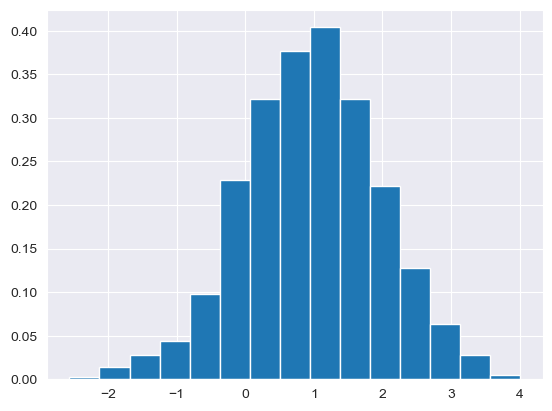

In [68]:
class Question3c:
    samples = np.random.normal(1, 1, size=1000)
    density_plot = plt.hist(samples, bins=15, density=True)

In [69]:
grader.check("Question 3c")

Question 3c results: All test cases passed!


### Question 4a (1 Point)

As in the exercise sheet, we are working with the Basel Neighborhood data. 


In [70]:
bs = pd.read_csv("basel_neighborhoods.csv", sep=";")
bs.head()

,publikationsjahr,wohnviertel_id,wohnviertel_name,anteil_sozialhilfeempfaenger,anteil_auslaender,anteil_personen_ohne_religionszugehoerigkeit,anteil_personen_in_einpersonenhaushalten,gymnasialquote,altersquotient,anteil_sesshafte,...,baujahr_der_wohngebaeude,anteil_einfamilienhaeuser,anteil_gruenflaechen,flaeche_pro_wohnung,wohnflaeche_pro_person,vermoegenssteuer_pro_veranlagung,einkommenssteuer_pro_veranlagung,erwerbstaetigenquote,arbeitsplaetze_pro_einwohner,arbeitslosenquote
0,2015,1,Altstadt Grossbasel,0.017115,0.251426,0.517930,0.324463,0.777778,0.297921,0.328851,...,1825.400406,0.101626,0.066693,90.808059,55.739958,4297.479726,15795.731129,0.824263,4.354447,0.019072
1,2015,2,Vorstädte,0.031635,0.353328,0.532251,0.345813,0.636364,0.374726,0.279170,...,1899.097967,0.075786,0.194198,81.803421,51.200218,4902.317140,14894.945946,0.779869,4.530718,0.023471
2,2015,7,Bruderholz,0.017662,0.229827,0.458660,0.166817,0.608108,0.442465,0.427310,...,1948.410577,0.734615,0.713769,109.383218,50.067809,8585.686671,18103.101406,0.752834,0.130144,0.023127
3,2015,8,Bachletten,0.022092,0.210320,0.455482,0.224974,0.609137,0.374629,0.421825,...,1934.025590,0.561775,0.408619,93.179580,47.396467,1632.650810,11363.577884,0.790006,0.190061,0.023636
4,2015,10,Iselin,0.089462,0.360277,0.445545,0.284152,0.262357,0.260469,0.331530,...,1937.165632,0.167702,0.375125,68.638626,37.648552,425.867934,6405.308048,0.701177,0.155020,0.042679


Compute the correlation coefficient between "anteil_auslaender" (fraction of foreigners) and 
"anteil_personen_ohne_religionszugehoerigkeit" (fraction of people not identifying as religious). 

In [71]:
class Question4a:
    corr = bs['anteil_auslaender'].corr(bs['anteil_personen_ohne_religionszugehoerigkeit'])
    print("correlation = ", corr)

correlation =  -0.4435776414928611


In [72]:
grader.check("Question 4a")

Question 4a results: All test cases passed!

### Question 4b (1 Point)

Compute the mean and standard deviation of the "anteil_auslaender" in the "publikationsjahr" 2015.

In [73]:
class Question4b:
    bs_2015 = bs[bs['publikationsjahr'] == 2015]
    mean_fraction_foreigners = bs_2015['anteil_auslaender'].mean()
    stddev_fraction_foreigners = bs_2015['anteil_auslaender'].std()
    print(f"mean {mean_fraction_foreigners}, standard dev {stddev_fraction_foreigners}")

mean 0.3508893859952381, standard dev 0.10362685937102915


In [74]:
grader.check("Question 4b")

Question 4b results: All test cases passed!

### Question 4c  (1 Points)

Compute the probability $P(X - 0.5 > 1.5)$, assuming $X$ follows a standard normal distribution.  

In [75]:
class Question4c:
    std_norm = stats.norm(0, 1)
    p_value = std_norm.sf(1.5)
    print(p_value)

0.06680720126885807


In [76]:
grader.check("Question 4c")

Question 4c results: All test cases passed!

### Question 5a: (1 point)


In [77]:
from sklearn.datasets import load_iris

df = load_iris(as_frame=True).data
display(df)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Use scikit learns standard scaler to scale the data such that each column has standard deviation 1 and mean 0.

In [80]:

class Question5a:
    scaler = StandardScaler()
    scaler.fit(df)
    scaled_df = scaler.transform(df)


In [81]:
grader.check("Question 5a")

Question 5a results: All test cases passed!

### Question 5b

Train a linear regression model to predict `petal width` from the three other variables.
You can use the original dataset `df`. Don't use the scaled dataset from the previous exercise. 

In [82]:
from sklearn.linear_model import LinearRegression


class Question5b:
    X = df[['sepal length (cm)', 'sepal width (cm)',
            'petal length (cm)']]  # sepal length, sepal width and petal length    
    y = df['petal width (cm)']  # petal width
    regr = LinearRegression()
    regr.fit(X, y)  # regression model

In [83]:
grader.check("Question 5b")

Question 5b results: All test cases passed!

### Question 5c (1 Point)

Define a MLPRegressor with 2 layers. The first one should have 10 neurons and 
the second one 7. Use `tanh` as the activation function. 

Remark: You don't need to fit any data. Simply define the regressor. To find out how to 
set the activation function, use pythons help function. 

In [84]:
from sklearn.neural_network import MLPRegressor


class Question5c:
    mlp = MLPRegressor(hidden_layer_sizes=(10, 7), activation='tanh')


In [85]:
grader.check("Question 5c")

Question 5c results: All test cases passed!

In [86]:
grader.check_all()

Question 1a results: All test cases passed!

Question 1b results: All test cases passed!

Question 1c results: All test cases passed!

Question 2a results: All test cases passed!

Question 2b results: All test cases passed!

Question 2c results: All test cases passed!

Question 3a results: All test cases passed!

Question 3b results: All test cases passed!

Question 3c results: All test cases passed!

Question 4a results: All test cases passed!

Question 4b results: All test cases passed!

Question 4c results: All test cases passed!

Question 5a results: All test cases passed!

Question 5b results: All test cases passed!

Question 5c results: All test cases passed!